In [2]:
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
presorted = {k: v for k, v in scipy.io.loadmat('spike_waveforms').items()\
            if k in('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}
presorted = [presorted['sig118a_wf'],presorted['sig118b_wf'],presorted['sig118c_wf']]

In [14]:
def make_training_set(data):
    n = data.shape[0]
    idx_training = np.random.choice(n,n//6,replace = False)
    training_set = data[idx_training]
    test_set = [data[i] for i in range(n) if n not in idx_training]
    return training_set, test_set

In [27]:
two_neurons_training, two_neurons_test = make_training_set(np.concatenate([presorted[1:]]))
three_neurons_training, three_neurons_test = make_training_set(np.concatenate(presorted))

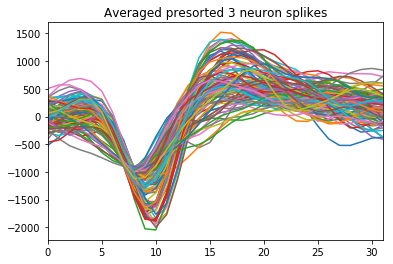

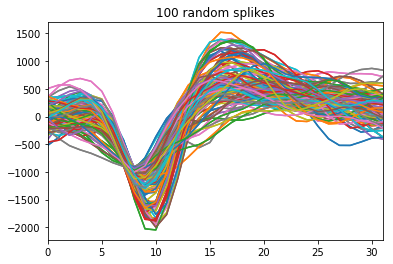

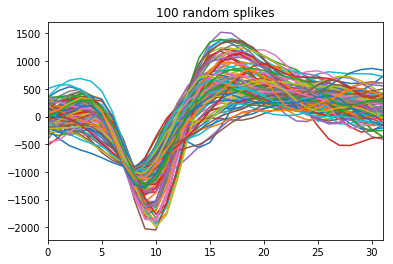

In [20]:
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random splikes')
plt.show()

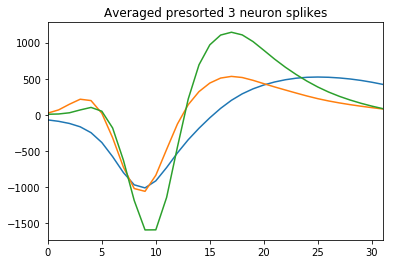

In [21]:
plt.figure()
for waveforms in presorted:
    plt.plot(np.mean(waveforms, axis = 0))
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron splikes')
plt.show()

In [22]:
def PCA_train(training_set, n_components):
    mean = np.mean(training_set, axis = 0)
    data = training_set-mean
    U,SVT = np.linalg.svd(data)
    
    basis_components = VT[:n_components,:]
    
    return basis_components, mean

In [23]:
def PCA_classify(data, new_basis, mean):
    return(np.array(data) - mean)@ new_basis.T

In [29]:
two_new_basis, two_mean = PCA_train(two_neurons_training,2)

ValueError: too many values to unpack (expected 2)

In [26]:
two_neurons_training.shape

(0,)